In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import tensorflow as tf
import vgg16
import utils

In [3]:
from skimage import io
import matplotlib.pyplot as plt

!pip install scikit-image

!pip install skimage

#### Image Load 및 data 준비하기

In [4]:
#fn1 ="./test_data/tiger.jpeg"
fn1 ="./test_data/bottle1.jpg"
#fn1 ="./test_data/puzzle.jpeg"
#fn1 ="./test_data/6201041_sd.jpg"
fn2 ="./test_data/phone.jpg"
#fn2 = "./test_data/IMG_0358s.jpg"

In [5]:
i1 = io.imread(fn1)
i2 = io.imread(fn2)

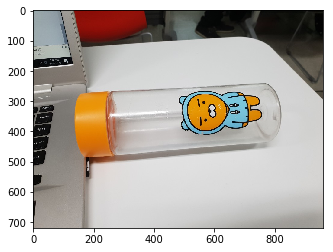

In [6]:
plt.imshow(i1)

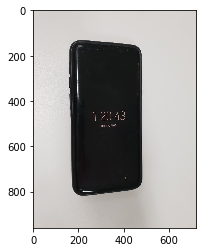

In [7]:
plt.imshow(i2)

f, axarr = plt.subplots(1,2, sharey=True, figsize=(11,5))
axarr[0].imshow(i1)
axarr[1].imshow(i2)

In [8]:
img1 = utils.load_image(fn1)
img2 = utils.load_image(fn2)

# Just in case of using four-channel images
img1 = img1[:, :, :3]
img2 = img2[:, :, :3]

print(img1.shape)
print(img2.shape)

(224, 224, 3)
(224, 224, 3)


In [9]:
img1r = img1.reshape((1, 224, 224, 3))
img2r = img2.reshape((1, 224, 224, 3))

print(img1r.shape)
print(img2r.shape)

(1, 224, 224, 3)
(1, 224, 224, 3)


In [10]:
batch = np.concatenate((img1r, img2r), 0)
print(batch.shape)

(2, 224, 224, 3)


#### VGG model 

In [11]:
# !wget https://www.dropbox.com/s/8a8rei66f72um4i/vgg16.npy
vgg = vgg16.Vgg16('vgg16.npy')
#print(vgg.data_dict)

npy file loaded


#### Tensorflow

In [12]:
images = tf.placeholder("float", [2, 224, 224, 3])

In [13]:
vgg.build(images)

build model started
build model finished: 25s


* Students : vgg16.py 를 열어서 build 함수 이해하기

In [14]:
# initialize
sess = tf.InteractiveSession()

In [15]:
feed_dict = {images: batch}
prob = sess.run(vgg.prob, feed_dict=feed_dict)

#### 예측 결과 출력하기

In [16]:
print(prob[0])

[7.68325208e-08 1.43103434e-05 3.94165482e-08 4.38710508e-08
 1.70677723e-07 2.24184262e-08 5.76364823e-09 4.07199423e-07
 2.94778147e-07 1.11824940e-08 1.20091130e-07 3.93839912e-07
 7.48918637e-07 4.39070504e-08 1.78268422e-07 2.03914013e-07
 9.13433951e-07 5.69773029e-08 8.64332151e-07 1.82289639e-07
 5.77841170e-08 1.35281539e-07 6.81750578e-07 1.76436359e-07
 5.18390593e-08 2.95142684e-07 1.15559367e-07 1.18193725e-06
 5.81139368e-08 7.53035977e-07 7.85848187e-08 1.16034391e-06
 5.39975076e-07 3.01245819e-07 5.44150147e-08 3.52626124e-08
 4.46762385e-07 4.26424009e-07 1.13201497e-06 3.79704908e-08
 3.03381626e-07 5.09271416e-08 3.19853228e-07 3.93328854e-08
 3.77681033e-08 6.05295497e-07 8.65560366e-07 1.64776395e-07
 1.75372534e-08 9.24582508e-08 2.45375773e-08 3.10098862e-08
 1.56173667e-06 3.25856331e-06 3.18780081e-07 2.12849855e-07
 3.70148291e-06 1.24976410e-07 3.27113725e-07 2.03256405e-07
 1.17351578e-06 1.55517711e-07 9.94466873e-08 6.90530229e-08
 5.20439130e-07 9.015798

In [17]:
print(prob[0].shape)

(1000,)


In [18]:
print(np.argmax(prob[0]))

720


In [19]:
# returns the top1 string
def print_prob(prob, file_path):
    synset = [l.strip() for l in open(file_path).readlines()]

    # print prob
    pred = np.argsort(prob)[::-1]

    # Get top1 label
    top1 = synset[pred[0]]
    print(("Top1: ", top1, prob[pred[0]]))
    # Get top5 label
    top5 = [(synset[pred[i]], prob[pred[i]]) for i in range(5)]
    print(("Top5: ", top5))
    return top1

In [20]:
#!cat synset.txt # Linux or Mac users
!type synset.txt # Windows users

n01440764 tench, Tinca tinca
n01443537 goldfish, Carassius auratus
n01484850 great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias
n01491361 tiger shark, Galeocerdo cuvieri
n01494475 hammerhead, hammerhead shark
n01496331 electric ray, crampfish, numbfish, torpedo
n01498041 stingray
n01514668 cock
n01514859 hen
n01518878 ostrich, Struthio camelus
n01530575 brambling, Fringilla montifringilla
n01531178 goldfinch, Carduelis carduelis
n01532829 house finch, linnet, Carpodacus mexicanus
n01534433 junco, snowbird
n01537544 indigo bunting, indigo finch, indigo bird, Passerina cyanea
n01558993 robin, American robin, Turdus migratorius
n01560419 bulbul
n01580077 jay
n01582220 magpie
n01592084 chickadee
n01601694 water ouzel, dipper
n01608432 kite
n01614925 bald eagle, American eagle, Haliaeetus leucocephalus
n01616318 vulture
n01622779 great grey owl, great gray owl, Strix nebulosa
n01629819 European fire salamander, Salamandra salamandra
n01630670 common newt, Tr

n04418357 theater curtain, theatre curtain
n04423845 thimble
n04428191 thresher, thrasher, threshing machine
n04429376 throne
n04435653 tile roof
n04442312 toaster
n04443257 tobacco shop, tobacconist shop, tobacconist
n04447861 toilet seat
n04456115 torch
n04458633 totem pole
n04461696 tow truck, tow car, wrecker
n04462240 toyshop
n04465501 tractor
n04467665 trailer truck, tractor trailer, trucking rig, rig, articulated lorry, semi
n04476259 tray
n04479046 trench coat
n04482393 tricycle, trike, velocipede
n04483307 trimaran
n04485082 tripod
n04486054 triumphal arch
n04487081 trolleybus, trolley coach, trackless trolley
n04487394 trombone
n04493381 tub, vat
n04501370 turnstile
n04505470 typewriter keyboard
n04507155 umbrella
n04509417 unicycle, monocycle
n04515003 upright, upright piano
n04517823 vacuum, vacuum cleaner
n04522168 vase
n04523525 vault
n04525038 velvet
n04525305 vending machine
n04532106 vestment
n04532670 viaduct
n04536866 violin, fiddle
n04540053 volleyball
n04542943 waf


synset.txt


지정된 파일을 찾을 수 없습니다.
다음 내용 진행 중 오류 발생: #.
지정된 파일을 찾을 수 없습니다.
다음 내용 진행 중 오류 발생: Windows.
지정된 파일을 찾을 수 없습니다.
다음 내용 진행 중 오류 발생: users.


In [21]:
top1 = print_prob(prob[0], 'synset.txt')

('Top1: ', 'n03937543 pill bottle', 0.5949909)
('Top5: ', [('n03937543 pill bottle', 0.5949909), ('n03666591 lighter, light, igniter, ignitor', 0.06125215), ('n03887697 paper towel', 0.054781903), ('n02783161 ballpoint, ballpoint pen, ballpen, Biro', 0.034317914), ('n04357314 sunscreen, sunblock, sun blocker', 0.028043116)])


In [22]:
print("Top1: {}".format(top1))

Top1: n03937543 pill bottle


In [23]:
print_prob(prob[1], 'synset.txt')

('Top1: ', 'n03492542 hard disc, hard disk, fixed disk', 0.26140878)
('Top5: ', [('n03492542 hard disc, hard disk, fixed disk', 0.26140878), ('n03777754 modem', 0.15510485), ('n03584254 iPod', 0.09246006), ('n04074963 remote control, remote', 0.07566404), ('n04041544 radio, wireless', 0.06351264)])


'n03492542 hard disc, hard disk, fixed disk'